<a href="https://colab.research.google.com/github/rajat-masanagi/djs-compute-tasks/blob/main/Task%206/Another_copy_of_Boosting_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting task

Make a copy of this colab file and follow the instructions to complete the task. You are expected to complete the entire task and it would be appreciated if you did more than what is aksed from you.


ALL THE BEST!

Importing necessary libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb


colour = sns.color_palette()

Reading and converting data into a date-time format

In [31]:
df = pd.read_csv('AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df.head()


,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [32]:
df.columns

Index(['AEP_MW'], dtype='object')

Plot the data:

<Axes: xlabel='Datetime'>

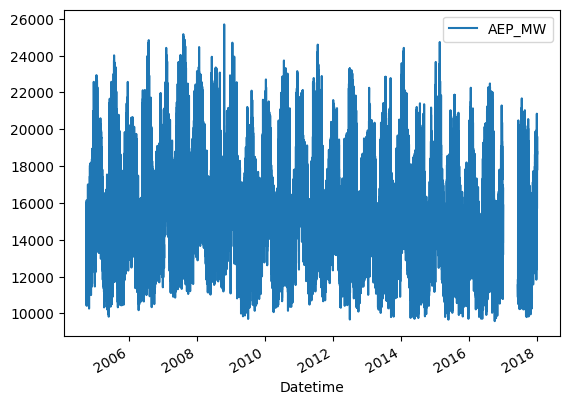

In [33]:
df.plot()

## Data splitting

Split the data into training and testing data, split data at 01-01-2016

In [48]:
train_data = df[df.index < '2016-01-01']
test_data = df[df.index >= '2016-01-01']

plot the train and test data

<Axes: xlabel='Datetime'>

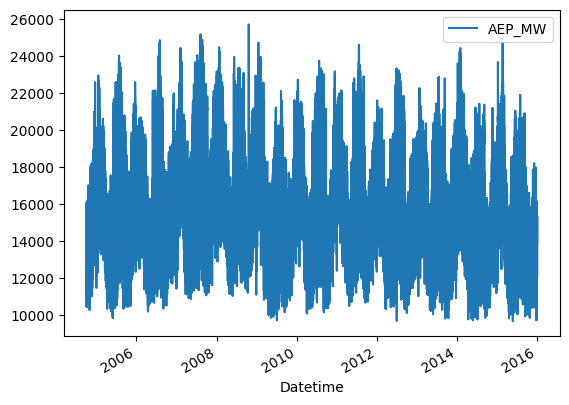

In [35]:
train_data.plot()

<Axes: xlabel='Datetime'>

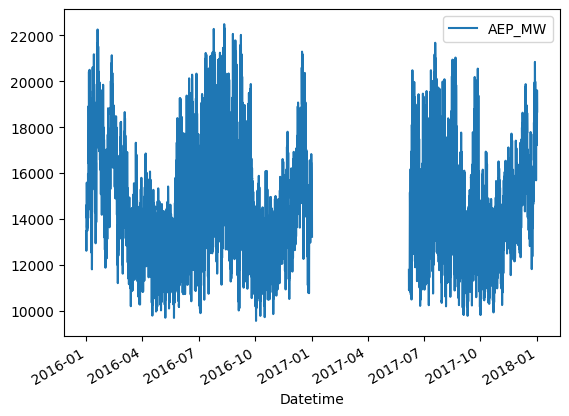

In [36]:
test_data.plot()

Plot data for a random week AND day, to visualize weekly and daily variations in data

<Axes: xlabel='Datetime'>

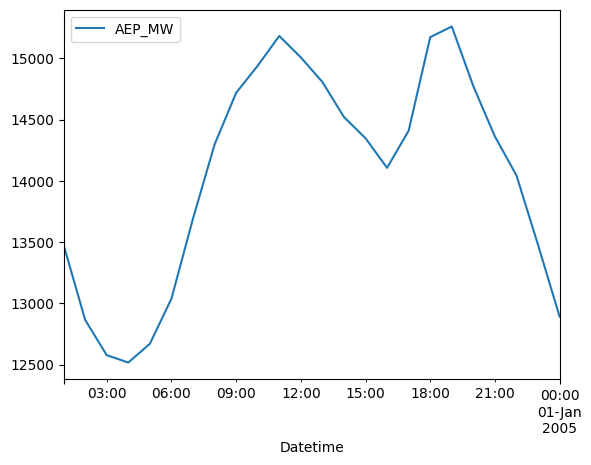

In [37]:
train_data[:24].plot()

<Axes: xlabel='Datetime'>

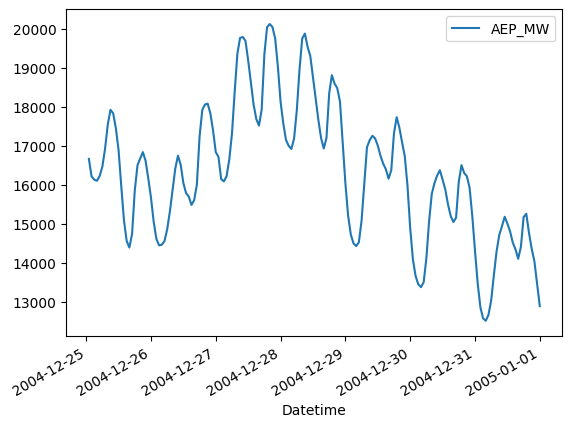

In [38]:
train_data[:168].plot()

## Feature Creation


Create different features for: hour, day, month, year, week and append it to the data-frame

In [39]:
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Week'] = df.index.week
df.head()

<ipython-input-39-4fa4dcb64a5a>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Week'] = df.index.week


,AEP_MW,Hour,Day,Month,Year,Week
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,1,31,12,2004,53
2004-12-31 02:00:00,12865.0,2,31,12,2004,53
2004-12-31 03:00:00,12577.0,3,31,12,2004,53
2004-12-31 04:00:00,12517.0,4,31,12,2004,53
2004-12-31 05:00:00,12670.0,5,31,12,2004,53


In [40]:
df.isna().sum()

AEP_MW    1
Hour      0
Day       0
Month     0
Year      0
Week      0
dtype: int64

In [41]:
df.dropna(inplace=True)

Make boxplots to depict energy consumption hourly and monthly.(x variable would be hour and month and y variable would be the feature 'AEP_MW'

Text(0, 0.5, 'AEP_MW')

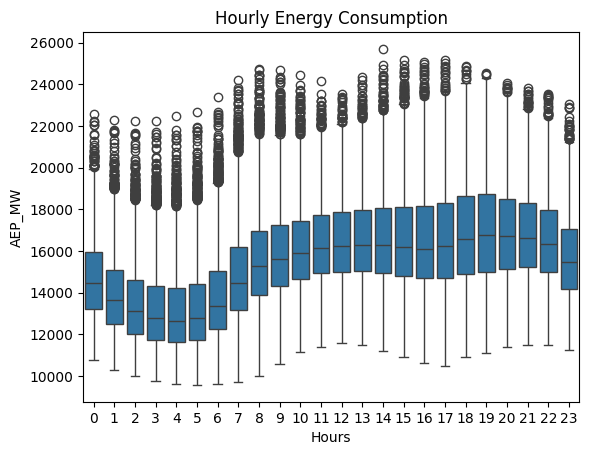

In [46]:
sns.boxplot(x='Hour', y='AEP_MW', data=df)
plt.title('Hourly Energy Consumption')
plt.xlabel('Hours')
plt.ylabel('AEP_MW')

Text(0, 0.5, 'AEP_MW')

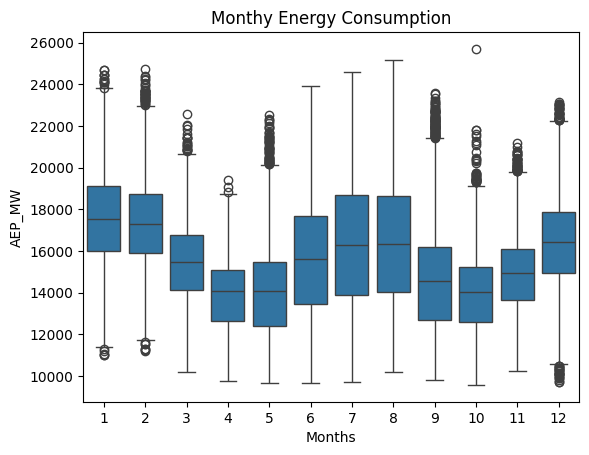

In [44]:
sns.boxplot(x='Month', y='AEP_MW', data=df)
plt.title('Monthy Energy Consumption')
plt.xlabel('Months')
plt.ylabel('AEP_MW')

## Model Creation andEestimation

Run a regression XGBoost model on the training and testing data-set. Take 1000 estimators and learnning rate as 0.01

In [47]:
import xgboost as xg

In [61]:
x_train=train_data.iloc[:,0:]
y_train=train_data.iloc[:,0]
x_test=test_data.iloc[:,0:]
y_test=test_data.iloc[:,0]

In [59]:
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 1000, seed = 2,learning_rate=0.01)

xgb_r.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:37:37] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

Predict values for the testing set using the model and plot them

In [66]:
y_pred=xgb_r.predict(x_test)

Use RMSE to find out the accuracy of your model

In [69]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ",rmse)

RMSE:  31.26663487363767


Find the importance of each feature use

In [70]:
df.corr()

,AEP_MW,Hour,Day,Month,Year,Week
AEP_MW,1.000000,0.425077,0.000798,-0.146994,-0.166048,-0.145134
Hour,0.425077,1.000000,-0.000046,0.000055,-0.000277,-0.000007
Day,0.000798,-0.000046,1.000000,0.010030,0.003731,0.066449
Month,-0.146994,0.000055,0.010030,1.000000,0.010468,0.970571
Year,-0.166048,-0.000277,0.003731,0.010468,1.000000,0.011297
Week,-0.145134,-0.000007,0.066449,0.970571,0.011297,1.000000
